Copyright (C) 2024  Adam Jones  All Rights Reserved

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import figure_standard
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import os

In [2]:
n_boot = 10001
figure_standard.standardize_plot_settings()
main_palette = figure_standard.create_main_palette()

In [3]:
### c
df_epoch = pd.read_excel('../2_intermediate_data/testing_by_epoch.xlsx')
data_epoch = pd.melt(df_epoch, id_vars=['epoch_i'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))
epoch_bin_width = 60

data_epoch['epoch_bin'] = data_epoch['epoch_i'] // epoch_bin_width
data_epoch['time_hr'] = (data_epoch['epoch_bin'] + 0.5) * epoch_bin_width * 30 / 3600

In [4]:
### c
df_epoch = pd.read_excel('../2_intermediate_data/testing_by_epoch_realtime.xlsx')
data_epoch_rt = pd.melt(df_epoch, id_vars=['epoch_i'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))
epoch_bin_width = 60

data_epoch_rt['epoch_bin'] = data_epoch_rt['epoch_i'] // epoch_bin_width
data_epoch_rt['time_hr'] = (data_epoch_rt['epoch_bin'] + 0.5) * epoch_bin_width * 30 / 3600

1 extra bytes in post.stringData array
fdsc NOT subset; don't know how to subset; dropped
fond NOT subset; don't know how to subset; dropped
just NOT subset; don't know how to subset; dropped


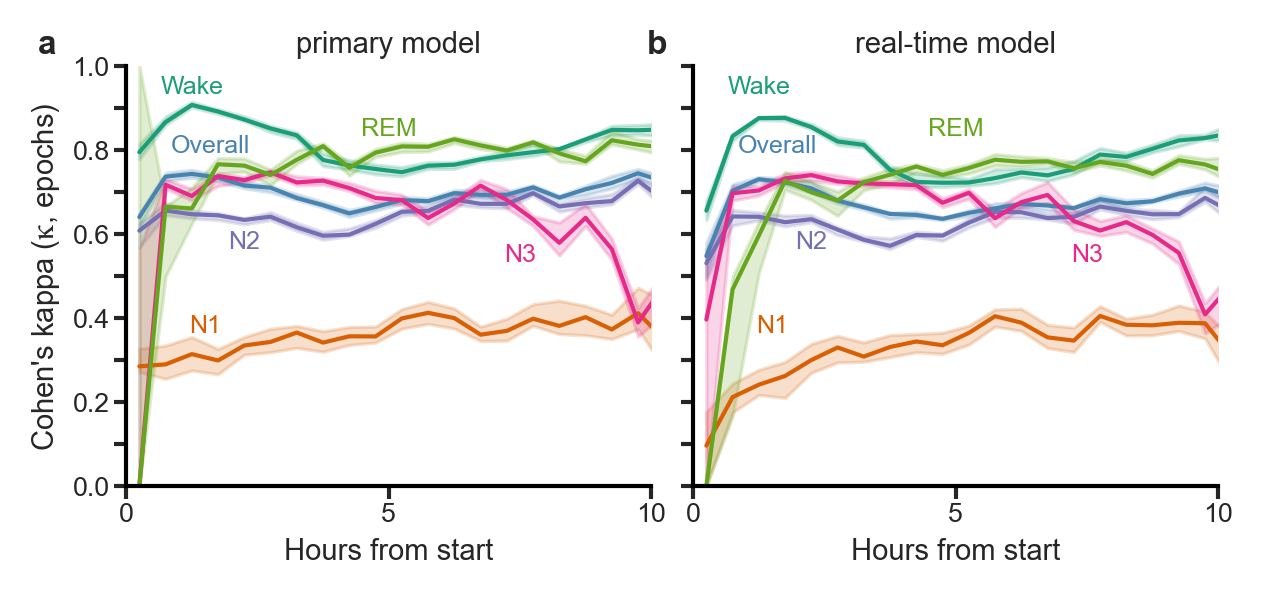

In [5]:
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1], sharey=ax1)


sns.lineplot(data=data_epoch, x="time_hr", 
             y="value", 
             linewidth=1,
             n_boot=n_boot,
             estimator='median',
             palette=main_palette,
             ax=ax1,
             hue="variable")



ax1.set_xlim((0, 10))
ax1.xaxis.set_major_locator(plt.MaxNLocator(2))

ax1.set_ylim([0, 1])
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

for label in ax1.get_yticklabels()[1::2]:
    label.set_visible(False)

sns.despine(ax=ax1, right=True, top=True, bottom=False)
ax1.grid(False)
ax1.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax1.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)

ax1.legend().remove()

ax1.text(0.16, 0.81, "Overall", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[0])

ax1.text(0.125, 0.95, "Wake", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[1])

ax1.text(0.15, 0.38, "N1", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[2])

ax1.text(0.225, 0.58, "N2", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[3])

ax1.text(0.75, 0.55, "N3", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[4])

ax1.text(0.50, 0.85, "REM", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[5])


labelpad = 2.5
ax1.set_ylabel('Cohen\'s kappa ($\kappa$, epochs)', fontweight=None, labelpad=labelpad)
ax1.set_xlabel('Hours from start', fontweight=None, labelpad=labelpad)



## real-time model

sns.lineplot(data=data_epoch_rt, x="time_hr", 
             y="value", 
             linewidth=1,
             n_boot=n_boot,
             estimator='median',
             palette=main_palette,
             ax=ax2,
             hue="variable")



ax2.set_xlim((0, 10))
ax2.xaxis.set_major_locator(plt.MaxNLocator(2))

ax2.set_ylim([0, 1])
ax2.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

for label in ax2.get_yticklabels()[:]:
    label.set_visible(False)

sns.despine(ax=ax2, right=True, top=True, bottom=False)
ax2.grid(False)
ax2.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax2.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)

ax2.legend().remove()

ax2.text(0.16, 0.81, "Overall", transform=ax2.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[0])

ax2.text(0.125, 0.95, "Wake", transform=ax2.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[1])

ax2.text(0.15, 0.38, "N1", transform=ax2.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[2])

ax2.text(0.225, 0.58, "N2", transform=ax2.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[3])

ax2.text(0.75, 0.55, "N3", transform=ax2.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[4])

ax2.text(0.50, 0.85, "REM", transform=ax2.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[5])


labelpad = 2.5
ax2.set_ylabel('', fontweight=None, labelpad=labelpad)
ax2.set_xlabel('Hours from start', fontweight=None, labelpad=labelpad)




### panel labels
panel_label_y = 1.05
panel_label_x = -0.15
panel_fontsize = 8

ax1.text(panel_label_x, panel_label_y, 'a', transform=ax1.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax2.text(-0.07, panel_label_y, 'b', transform=ax2.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')


panel_title_x = 0.5
title_fontsize = 7
ax1.text(panel_title_x, panel_label_y, 'primary model', transform=ax1.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax2.text(panel_title_x, panel_label_y, 'real-time model', transform=ax2.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')


plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.08)
figure_standard.scale_figure_by_axes(ax1, 1.4, 1.75)

# save the figure
filename = os.path.basename(globals()["__vsc_ipynb_file__"]).replace(".ipynb", "")
figure_standard.save_figure_files(filename)